# Notebook 06
# Airbus Ship DataSet 

# Regression

In [3]:
#hide
from fastbook import *

# Other Computer Vision Problems

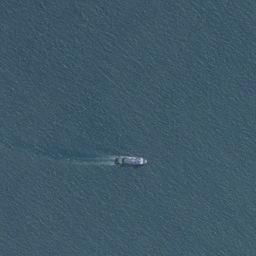

In [4]:
im = Image.open('images/ship-data/train_v2/000155de5.jpg')
im.to_thumb(256,256)

In [5]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [6]:
masks = pd.read_csv('./images/ship-data/train_ship_segmentations_v2.csv')
print(masks.shape[0], 'masks found')
print(masks['ImageId'].value_counts().shape[0])
masks.head(3)

231723 masks found
192556


,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971...


In [7]:
masks.head(5)

,ImageId,EncodedPixels
0,00003e153.jpg,NaN
1,0001124c7.jpg,NaN
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733 33 268501 33 269269 33 270037 33 270805 33 271573 33 272341 33 273109 33 273877 33 274645 33 275413 33 276181 33 276949 33 277716 34 278484 34 279252 33 280020 33 280788 33 281556 33 282324 33 283092 33 283860 33 284628 33 285396 33 286164 33 286932 33 287700 33 288468 33 289236 33 290004 33 290772 33 291540 33 292308 33 293076 33 293844 33 294612 33 295380 33 296148 33 296916 33 297684 33 298452 33 299220 33 299988 33 300756 33 301524 33 302292 33 303060 33 303827 34 304595 34 305363 33 306131 33 306899 33 307667 33 308435 33 309203 33 309971...
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 364321 10 365090 9 365858 10 366627 10 367396 9 368165 9 368933 10 369702 10 370471 9 371240 9 372009 9 372777 10 373546 9 374315 9 375084 7 375852 6 376621 3 377390 1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 7 56442 7 57210 7 57978 7 58746 7 59514 7 60282 7 61050 9 61818 9 62586 9 63354 9 64122 9 64890 9


In [9]:
df = masks

### Constructing a DataBlock

In [10]:
dblock = DataBlock()

In [11]:
dsets = dblock.datasets(df)

In [12]:
len(dsets.train),len(dsets.valid)

(185379, 46344)

In [13]:
x,y = dsets.train[0]
x,y

(ImageId          5e2f2590f.jpg
 EncodedPixels              NaN
 Name: 85300, dtype: object,
 ImageId          5e2f2590f.jpg
 EncodedPixels              NaN
 Name: 85300, dtype: object)

In [14]:
x['ImageId']

'5e2f2590f.jpg'

In [15]:
dblock = DataBlock(get_x = lambda r: r['ImageId'], get_y = lambda r: r['EncodedPixels'])
dsets = dblock.datasets(df)
dsets.train[0]

('9d785a2cd.jpg', nan)

In [16]:
dsets.train[2]

('cc0699c3f.jpg',
 '69383 1 70149 4 70915 6 71682 8 72448 10 73215 12 73981 15 74747 17 75514 19 76280 22 77047 23 77813 26 78579 28 79346 30 80112 33 80879 34 81645 37 82411 38 83178 37 83944 37 84711 37 85477 37 86243 38 87010 37 87776 37 88542 38 89309 37 90075 38 90842 37 91608 37 92374 38 93141 37 93907 38 94674 37 95440 37 96206 38 96973 37 97739 38 98506 37 99272 37 100038 38 100805 37 101571 37 102338 37 103104 37 103870 38 104637 37 105406 34 106174 33 106943 30 107711 29 108480 26 109249 23 110017 22 110786 19 111555 17 112323 15 113092 12 113860 11 114629 8 115398 6 116166 4 116935 1')

In [17]:
def get_x(r): return r['ImageId']
def get_y(r): return r['EncodedPixels']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

('226b98f51.jpg', nan)

In [18]:
dsets.train[4]

('ab20d8e1d.jpg', nan)

In [19]:
path = Path('./images/ship-data/train-s750/shipyes')
path

Path('images/ship-data/train-s750/shipyes')

In [20]:
fnames = get_image_files(path)

In [21]:
fnames

(#750) [Path('images/ship-data/train-s750/shipyes/0002756f7.jpg'),Path('images/ship-data/train-s750/shipyes/0190215b2.jpg'),Path('images/ship-data/train-s750/shipyes/00a52cd2a.jpg'),Path('images/ship-data/train-s750/shipyes/003b48a9e.jpg'),Path('images/ship-data/train-s750/shipyes/020128a8d.jpg'),Path('images/ship-data/train-s750/shipyes/0178a78ec.jpg'),Path('images/ship-data/train-s750/shipyes/0235db857.jpg'),Path('images/ship-data/train-s750/shipyes/049a04990.jpg'),Path('images/ship-data/train-s750/shipyes/037192ffd.jpg'),Path('images/ship-data/train-s750/shipyes/00761707d.jpg')...]

In [22]:
#ship data
def get_x(r): return path/r['ImageId']
def get_y(r): return r['EncodedPixels']
dblock = DataBlock(get_x = get_x, get_y = get_y)
dsets = dblock.datasets(df)
dsets.train[0]

(Path('images/ship-data/train-s750/shipyes/173694811.jpg'), nan)

In [23]:
dsets.train[4]

(Path('images/ship-data/train-s750/shipyes/17e8eaf19.jpg'),
 '419046 4 419808 10 420570 16 421332 23 422097 26 422865 26 423633 26 424402 25 425170 26 425938 26 426706 26 427474 22 428243 15 429011 9 429779 3')

## Ship-StarterCode

In [76]:
import sys
! {sys.executable} -m pip install scikit-image #==1.0.12 #This right here


In [81]:
! {sys.executable} -m pip install imread

In [83]:
### https://www.kaggle.com/inversion/run-length-decoding-quick-start
    
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# from skimage.data import imread # not included in sci-kit image any more, install imread separately

from imread import imread
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("."))

# Any results you write to the current directory are saved as output.

In [36]:
def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

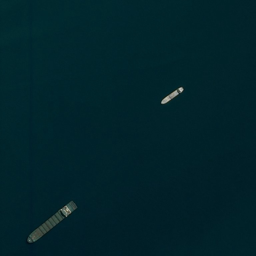

In [37]:
im = Image.open('images/ship-data/train_v2/0005d01c8.jpg')
im.to_thumb(256,256)

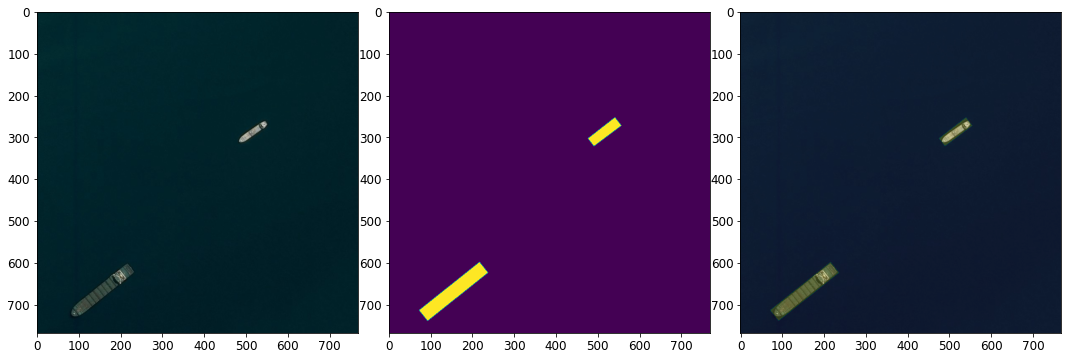

In [84]:
ImageId = '0005d01c8.jpg'

img = imread('images/ship-data/train_v2/' + ImageId)
img_masks = masks.loc[masks['ImageId'] == ImageId, 'EncodedPixels'].tolist()

# Take the individual ship masks and create a single mask array for all ships
all_masks = np.zeros((768, 768))
for mask in img_masks:
    all_masks += rle_decode(mask)

fig, axarr = plt.subplots(1, 3, figsize=(15, 5)) ## orig was figsize(15,40)
axarr[0].axis('on')
axarr[1].axis('on')
axarr[2].axis('on')

axarr[0].imshow(img)
axarr[1].imshow(all_masks)

axarr[2].imshow(img)
axarr[2].imshow(all_masks, alpha=0.2)
plt.tight_layout(h_pad=0.1, w_pad=0.1)
plt.show()

In [85]:
all_masks.shape

(768, 768)

In [40]:
! {sys.executable} -m pip install opencv-python

In [41]:
import os
import cv2
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops

# from skimage.util.montage import montage2d as montage
#### from skimage.util.montage2d import montage2d as montage

# montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
# ship_dir = '../input'
# train_image_dir = 'trainimages'
# test_image_dir = 'testimages'

from skimage.morphology import label
def multi_rle_encode(img):
    labels = label(img[:, :, 0])
    return [rle_encode(labels==k) for k in np.unique(labels[labels>0])]

# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

def masks_as_image(in_mask_list, all_masks=None):
    # Take the individual ship masks and create a single mask array for all ships
    if all_masks is None:
        all_masks = np.zeros((768, 768), dtype = np.int16)
    #if isinstance(in_mask_list, list):
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks += rle_decode(mask)
    return np.expand_dims(all_masks, -1)

In [42]:
images_with_ship = masks.ImageId[masks.EncodedPixels.isnull()==False]
images_with_ship = np.unique(images_with_ship.values)
print('There are ' +str(len(images_with_ship)) + ' image files with masks')


There are 42556 image files with masks


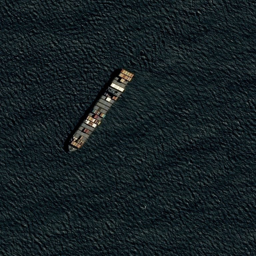

In [43]:
image = images_with_ship[9]
img_0 = Image.open('images/ship-data/train_v2/' + image)
img_0.to_thumb(256,256)

Image 000155de5.jpg
Found bbox (465, 344, 0, 501, 448, 1)
center:  (396, 483)


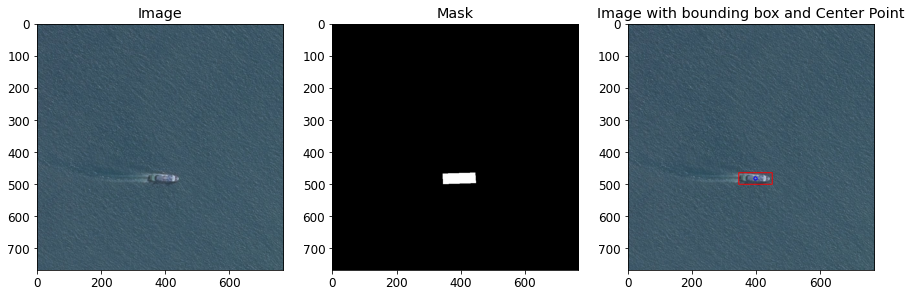

Image 000194a2d.jpg
Found bbox (377, 67, 0, 387, 85, 1)
center:  (76, 382)
Found bbox (174, 258, 0, 185, 306, 1)
center:  (282, 179)
Found bbox (178, 331, 0, 197, 370, 1)
center:  (350, 187)
Found bbox (287, 469, 0, 307, 492, 1)
center:  (480, 297)


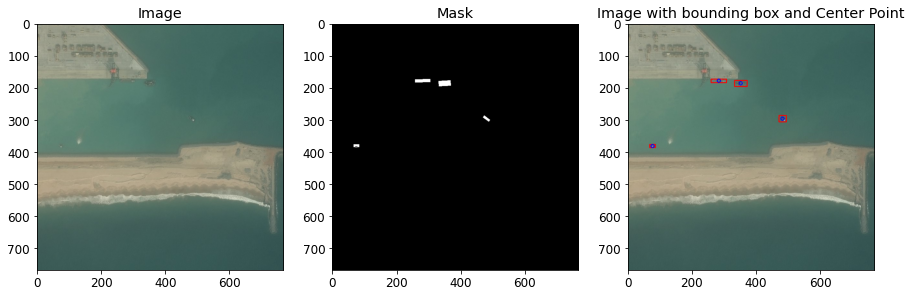

Image 00021ddc3.jpg
Found bbox (705, 96, 0, 720, 121, 1)
center:  (108, 712)
Found bbox (732, 123, 0, 768, 178, 1)
center:  (150, 750)
Found bbox (629, 181, 0, 638, 187, 1)
center:  (184, 633)
Found bbox (661, 195, 0, 665, 201, 1)
center:  (198, 663)


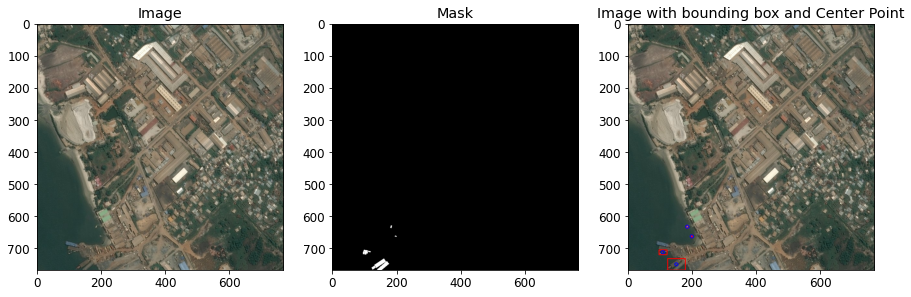

In [86]:
# https://github.com/aws-samples/amazon-sagemaker-architecting-for-ml/blob/master/Starter-Code/ship-data-transformation.ipynb

for i in range(3):
    image = images_with_ship[i]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
    ## img_0 = get_S3_image(train_image_dir+'/' + image)
    img_0 = imread('images/ship-data/train_v2/' + image) 
    rle_0 = masks.query('ImageId=="'+image+'"')['EncodedPixels']
    mask_0 = masks_as_image(rle_0)
    #
    # 
    lbl_0 = label(mask_0) 
    props = regionprops(lbl_0)
    img_1 = img_0.copy()
    print ('Image', image)
    for prop in props:
        print('Found bbox', prop.bbox)
        #        cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)
        cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[4], prop.bbox[3]), (255, 0, 0), 2)

        # The centroid of a rectangle with opposite corners (x1, y1) and (x2, y2) 
        # lies at the center of that rectangle ((x1+x2)/2, (y1+y2)/2)
        center = (int((prop.bbox[1]+prop.bbox[4])/2),int((prop.bbox[0]+prop.bbox[3])/2))
        print("center: ", center)
        cv2.circle(img_1, center, 5, (0, 0, 255), 2)


    ax1.imshow(img_0)
    ax1.set_title('Image')
    ax2.set_title('Mask')
    ax3.set_title('Image with bounding box and Center Point')
    ax2.imshow(mask_0[...,0], cmap='gray')
    ax3.imshow(img_1)
    plt.show()

In [ ]:
# The centroid of a rectangle with opposite corners (x1, y1) and (x2, y2) lies at the center of that rectangle ((x1+x2)/2, (y1+y2)/2)



# Regression via Bounding Boxes

## Regression

## Ship Data Regression

In [45]:
def get_ctr(f):

    image = os.path.basename(f)

#     fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 5))
    ## img_0 = get_S3_image(train_image_dir+'/' + image)
#     img_0 = imread('images/ship-data/train_v2/' + image) 

    rle_0 = masks.query('ImageId=="'+image+'"')['EncodedPixels']
    mask_0 = masks_as_image(rle_0)
    #
    # 
    lbl_0 = label(mask_0) 
    props = regionprops(lbl_0)
#     img_1 = img_0.copy()
#     print ('Image', image)
    for prop in props:
#         print('Found bbox', prop.bbox)
        #        cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)
#         cv2.rectangle(img_1, (prop.bbox[1], prop.bbox[0]), (prop.bbox[4], prop.bbox[3]), (255, 0, 0), 2)

        # The centroid of a rectangle with opposite corners (x1, y1) and (x2, y2) 
        # lies at the center of that rectangle ((x1+x2)/2, (y1+y2)/2)
        center = ((prop.bbox[1]+prop.bbox[4])/2,(prop.bbox[0]+prop.bbox[3])/2)
#         print("center: ", center)
#         cv2.circle(img_1, center, 5, (0, 0, 255), 2)


#     ax1.imshow(img_0)
#     ax1.set_title('Image')
#     ax2.set_title('Mask')
#     ax3.set_title('Image with derived bounding box')
#     ax2.imshow(mask_0[...,0], cmap='gray')
#     ax3.imshow(img_1)
#     plt.show()
#     return tensor([c1,c2])
    return tensor(center)

In [46]:
get_ctr(images_with_ship[0])

tensor([396., 483.])

In [47]:
for i in range(5):
    print(get_ctr(images_with_ship[i]))

tensor([396., 483.])
tensor([480.5000, 297.0000])
tensor([198., 663.])
tensor([337.5000,  51.5000])
tensor([457.5000, 138.5000])


## Ship DataBlock and Train

In [87]:
path

Path('images/ship-data/train-s750/shipyes')

In [49]:
fnames

(#750) [Path('images/ship-data/train-s750/shipyes/0002756f7.jpg'),Path('images/ship-data/train-s750/shipyes/0190215b2.jpg'),Path('images/ship-data/train-s750/shipyes/00a52cd2a.jpg'),Path('images/ship-data/train-s750/shipyes/003b48a9e.jpg'),Path('images/ship-data/train-s750/shipyes/020128a8d.jpg'),Path('images/ship-data/train-s750/shipyes/0178a78ec.jpg'),Path('images/ship-data/train-s750/shipyes/0235db857.jpg'),Path('images/ship-data/train-s750/shipyes/049a04990.jpg'),Path('images/ship-data/train-s750/shipyes/037192ffd.jpg'),Path('images/ship-data/train-s750/shipyes/00761707d.jpg')...]

In [50]:
fnames[0]

Path('images/ship-data/train-s750/shipyes/0002756f7.jpg')

In [51]:
Path(fnames[0]).stem

'0002756f7'

In [52]:
os.path.basename(fnames[0])

'0002756f7.jpg'

In [53]:
## ship version
biwi = DataBlock(
    blocks=(ImageBlock, PointBlock),
    get_items=get_image_files,
    get_y=get_ctr,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(256)
)

In [54]:
dls = biwi.dataloaders(path)

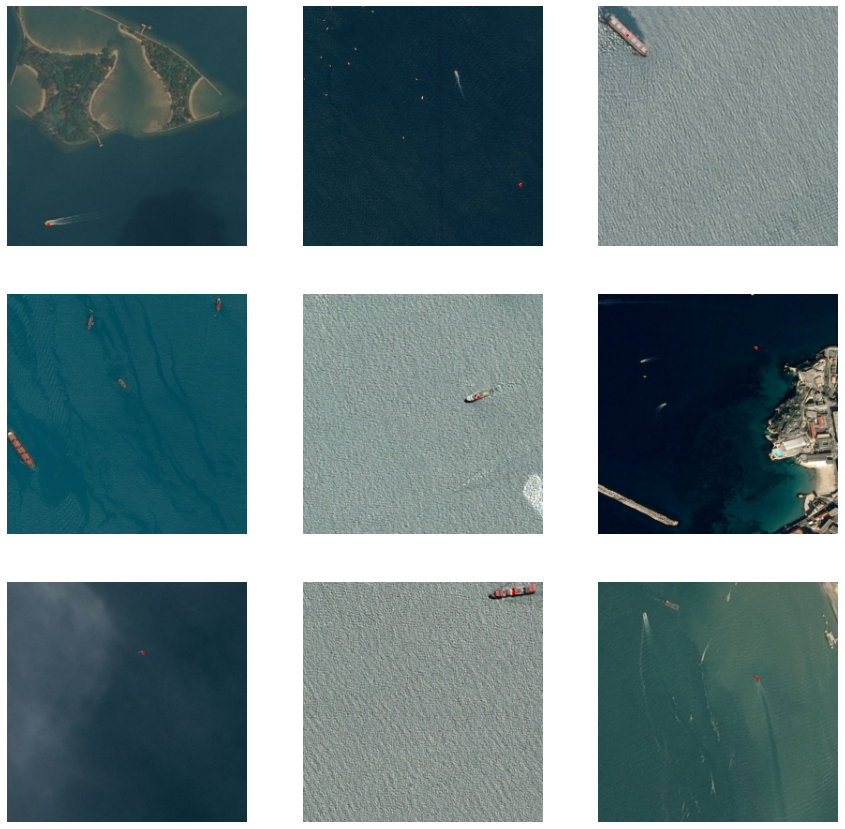

In [55]:
dls.show_batch(max_n=9, figsize=(15,15))

In [56]:
xb,yb = dls.one_batch()
xb.shape,yb.shape

(torch.Size([64, 3, 256, 256]), torch.Size([64, 1, 2]))

In [57]:
yb[0]

tensor([[ 0.6523, -0.0117]], device='cuda:0')

### Training a Model

In [88]:
learn = cnn_learner(dls, resnet18, y_range=(-1,1)) # , metrics=[error_rate, rmse]

In [59]:
def sigmoid_range(x, lo, hi): return torch.sigmoid(x) * (hi-lo) + lo

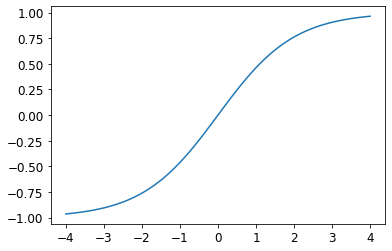

In [60]:
plot_function(partial(sigmoid_range,lo=-1,hi=1), min=-4, max=4)

In [89]:
dls.loss_func

FlattenedLoss of MSELoss()

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0030199517495930195)

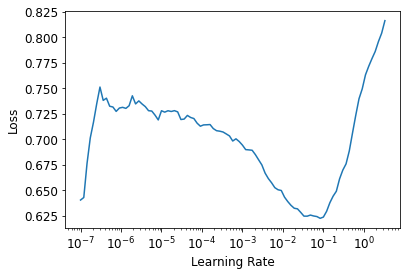

In [62]:
learn.lr_find()

In [90]:
lr = 1e-2
learn.fine_tune(20, lr)

epoch,train_loss,valid_loss,time
0,0.713455,0.687036,00:11


epoch,train_loss,valid_loss,time
0,0.551995,0.622032,00:13
1,0.499384,0.570815,00:13
2,0.427519,0.487036,00:13
3,0.386010,0.522942,00:13
4,0.352231,0.521709,00:13
5,0.329988,0.407346,00:13
6,0.307068,0.421796,00:13
7,0.285022,0.360984,00:13
8,0.256037,0.243216,00:13
9,0.226363,0.233403,00:13


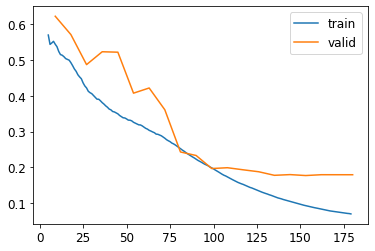

In [91]:
learn.recorder.plot_loss()


In [92]:
math.sqrt(0.0001)

0.01

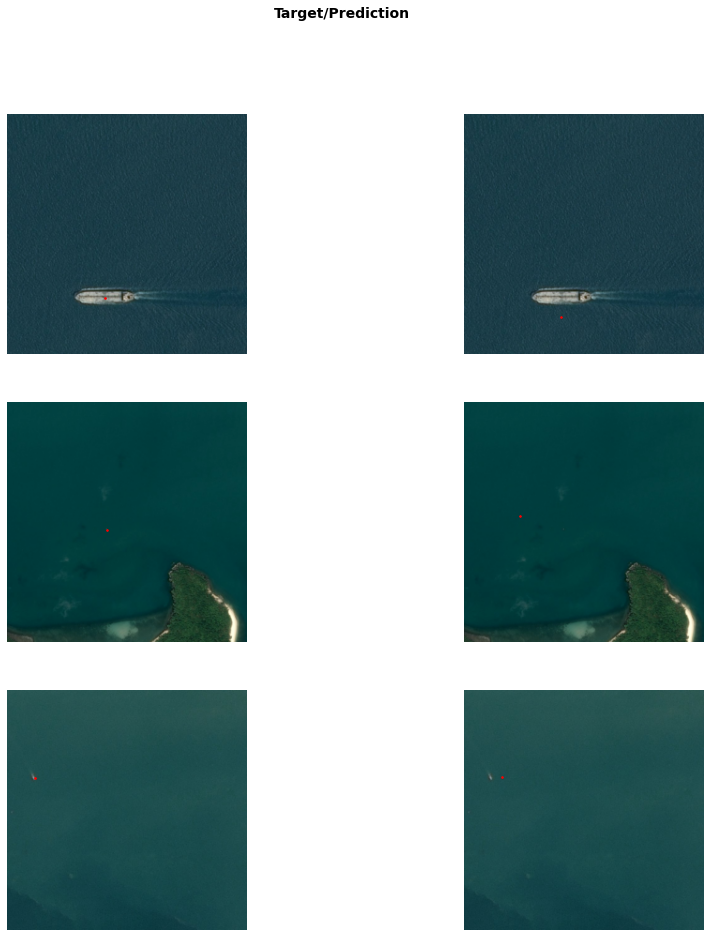

In [95]:
learn.show_results(ds_idx=0, nrows=3, figsize=(15,15))

## Conclusion

## Questionnaire

1. How could multi-label classification improve the usability of the bear classifier?
1. How do we encode the dependent variable in a multi-label classification problem?
1. How do you access the rows and columns of a DataFrame as if it was a matrix?
1. How do you get a column by name from a DataFrame?
1. What is the difference between a `Dataset` and `DataLoader`?
1. What does a `Datasets` object normally contain?
1. What does a `DataLoaders` object normally contain?
1. What does `lambda` do in Python?
1. What are the methods to customize how the independent and dependent variables are created with the data block API?
1. Why is softmax not an appropriate output activation function when using a one hot encoded target?
1. Why is `nll_loss` not an appropriate loss function when using a one-hot-encoded target?
1. What is the difference between `nn.BCELoss` and `nn.BCEWithLogitsLoss`?
1. Why can't we use regular accuracy in a multi-label problem?
1. When is it okay to tune a hyperparameter on the validation set?
1. How is `y_range` implemented in fastai? (See if you can implement it yourself and test it without peeking!)
1. What is a regression problem? What loss function should you use for such a problem?
1. What do you need to do to make sure the fastai library applies the same data augmentation to your inputs images and your target point coordinates?

### Further Research

1. Read a tutorial about Pandas DataFrames and experiment with a few methods that look interesting to you. See the book's website for recommended tutorials.
1. Retrain the bear classifier using multi-label classification. See if you can make it work effectively with images that don't contain any bears, including showing that information in the web application. Try an image with two different kinds of bears. Check whether the accuracy on the single-label dataset is impacted using multi-label classification.